# 1/DataEngineering

In [1]:
import pandas as pd
import numpy as np

In [2]:
sep = "\n\n"

In [ ]:
import pandas as pd

# b) Load and represent the data using an appropriate data structure.
df = pd.read_csv(r"C:\Users\ahmed\Downloads\archive (1)\online_retail_customer_churn.csv")

# Drop Customer_ID column
df = df.drop("Customer_ID", axis=1)

# c. Give a description of the data set like size, features, target variables, predictive variables, feature types, etc.
print("Size of the dataset: \n", df.shape, sep)
print("Features : \n", df.columns, sep)
predictive_variable = df.columns[:-1].tolist()
target_variable = df.columns[-1]
print("Predictive Variables : \n", predictive_variable, sep)
print("Target variable : \n", target_variable, sep)
print("Feature types : \n", df.dtypes, sep)

# d. Apply any preprocessing steps that might be required to clean or filter the data before analysis.

# Convert categorical columns to numerical
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Email_Opt_In'] = df['Email_Opt_In'].astype(int)  # Convert boolean to integer
df['Promotion_Response'] = df['Promotion_Response'].map({'Responded': 1, 'Unsubscribed': 0, 'Ignored': -1})

# check for incomplete data
missing_values = df.isnull().sum()
print("missing_values : \n", missing_values, sep)

# Check for noisy data
column_checks = {
    'Age': lambda x: 'Noisy data found in Age column: ' + str(x[(x < 0) | (x > 150)]) if not x[
                                                                                                     (x < 0) | (
                                                                                                             x > 150)].empty else None,
    'Annual_Income': lambda x: 'Noisy data found in Annual_Income column: ' + str(x[x < 0]) if not x[
                                                                                                       x < 0].empty else None,
    'Total_Spend': lambda x: 'Noisy data found in Total_Spend column: ' + str(x[x < 0]) if not x[
                                                                                                     x < 0].empty else None,
    'Years_as_Customer': lambda x: 'Noisy data found in Years_as_Customer column: ' + str(x[x < 0]) if not x[
                                                                                                                 x < 0].empty else None,
    'Num_of_Purchases': lambda x: 'Noisy data found in Num_of_Purchases column: ' + str(x[x < 0]) if not x[
                                                                                                               x < 0].empty else None,
    'Num_of_Returns': lambda x: 'Noisy data found in Num_of_Returns column: ' + str(x[x < 0]) if not x[
                                                                                                             x < 0].empty else None,
    'Num_of_Support_Contacts': lambda x: 'Noisy data found in Num_of_Support_Contacts column: ' + str(x[
                                                                                                                x < 0]) if not x[
                                                                                                                                  x < 0].empty else None,
    'Satisfaction_Score': lambda x: 'Noisy data found in Satisfaction_Score column: ' + str(x[x < 0]) if not x[
                                                                                                                  x < 0].empty else None,
    'Average_Transaction_Amount': lambda x: 'Noisy data found in Average_Transaction_Amount column: ' + str(x[
                                                                                                                      x < 0]) if not x[
                                                                                                                                      x < 0].empty else None,
    'Last_Purchase_Days_Ago': lambda x: 'Noisy data found in Last_Purchase_Days_Ago column: ' + str(x[
                                                                                                              x < 0]) if not x[
                                                                                                                                x < 0].empty else None,
    'Email_Opt_In': lambda x: 'Unexpected values found in Email_Opt_In column: ' + str(x[~x.isin(
        [0, 1])]) if not x[~x.isin([0, 1])].empty else None,
    'Promotion_Response': lambda x: 'Unexpected values found in Promotion_Response column: ' + str(
        x[~x.isin([1, 0, -1])]) if not x[~x.isin([1, 0, -1])].empty else None,
    'Target_Churn': lambda x: 'Unexpected values found in Target_Churn column: ' + str(
        x[~x.isin([0, 1])]) if not x[~x.isin([0, 1])].empty else None
}

incorrect_values_found = False
for column in df.columns:
    if column in column_checks:
        result = column_checks[column](df[column])
        if result:
            print("Checking column:", column)
            print(result)
            print("\n")
            incorrect_values_found = True
    else:
        print("No specific check implemented for column:", column, sep)

if not incorrect_values_found:
    print("All values in the dataset are correct!", sep)

# check for duplicated records
df = df.drop_duplicates()
print("Size of the dataset: \n", df.shape, sep)

# e. Analyze, characterize, and summarize the cleaned dataset, using tables and plots where appropriate. Clearly explain and interpret any analysis results which are produced.
print('Description Table : \n', df.describe(), sep)
print("Feature types : \n", df.dtypes, sep)
df


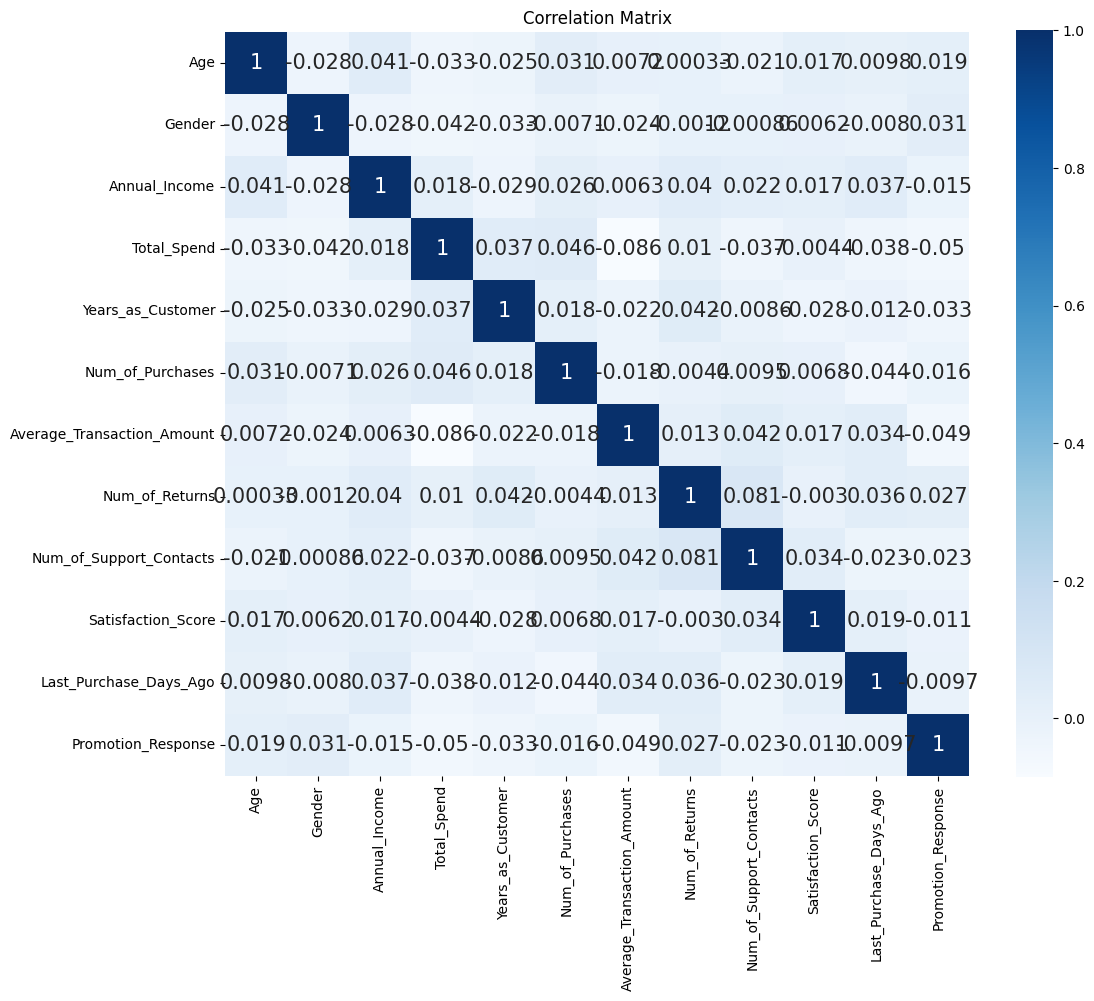



 this suggests that there are no strong linear relationships between the predictive variables in the dataset.Further analysis is needed to understand the impact of each predictive variable on customer churn.


 Since there are no highly correlated columns in the dataset, data reduction techniques offer a promising avenue for improving computational efficiency and model interpretability. Here are some strategies to consider: 
Dimensionality Reduction: Apply dimensionality reduction methods such as Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) to transform the original high-dimensional feature space into a lower-dimensional subspace while preserving as much variance as possible. This can help alleviate the curse of dimensionality, reduce overfitting, and speed up model training and inference. 
Clustering: Explore clustering algorithms such as k-means clustering or hierarchical clustering to identify groups of similar customers based on their feature profiles.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map(df):
    # Exclude non-numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    corr = numeric_df.corr()

    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap="Blues", square=True, cbar_kws={'shrink': 0.97}, annot=True, annot_kws={'fontsize': 15})
    plt.title('Correlation Matrix')
    plt.show()

# Call the function with your DataFrame
plot_correlation_map(df)



# f. Summarize any insights which you gained from your analysis of the data. 
print(sep,"this suggests that there are no strong linear relationships between the predictive variables in the dataset.Further analysis is needed to understand the impact of each predictive variable on customer churn.")

# g. Suggest ideas for further analysis which could be performed on the data like data transformation and data reduction. Conduct the suggested analysis and clearly explain your results
print(sep, """Since there are no highly correlated columns in the dataset, data reduction techniques offer a promising avenue for improving computational efficiency and model interpretability. Here are some strategies to consider: 
Dimensionality Reduction: Apply dimensionality reduction methods such as Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) to transform the original high-dimensional feature space into a lower-dimensional subspace while preserving as much variance as possible. This can help alleviate the curse of dimensionality, reduce overfitting, and speed up model training and inference. 
Clustering: Explore clustering algorithms such as k-means clustering or hierarchical clustering to identify groups of similar customers based on their feature profiles. Instead of using all individual features, representative cluster centroids or cluster memberships can be used as compact representations of the data, reducing the dimensionality and complexity of the problem.""")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


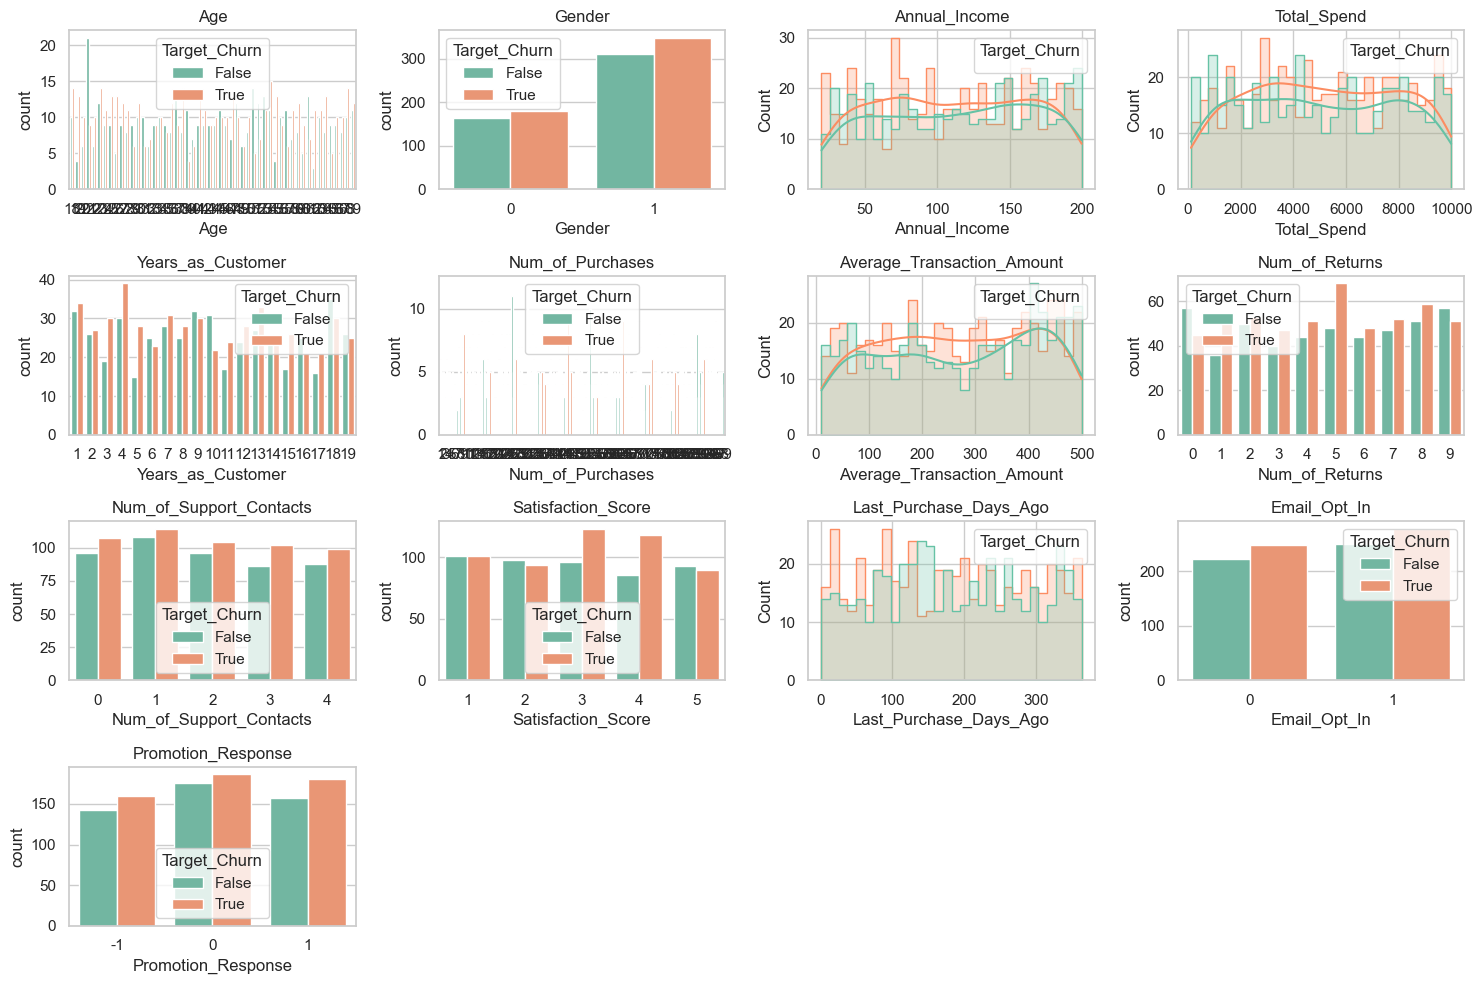

In [5]:

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Predictive variables
predictive_variables = ['Age', 'Gender', 'Annual_Income', 'Total_Spend', 
                        'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 
                        'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 
                        'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response']

# Target variable
target_variable = 'Target_Churn'

# Set figure size
plt.figure(figsize=(15, 10))

# Iterate over predictive variables and plot count plots
for i, variable in enumerate(predictive_variables):
    plt.subplot(4, 4, i + 1)
    
    if variable in ['Annual_Income', 'Average_Transaction_Amount', 'Total_Spend']:
        sns.histplot(data=df, x=variable, hue=target_variable, element='step', bins=30, kde=True, palette='Set2')
    elif variable == 'Last_Purchase_Days_Ago':
        sns.histplot(data=df, x=variable, hue=target_variable, element='step', bins=30, palette='Set2')
    else:
        sns.countplot(data=df, x=variable, hue=target_variable, palette='Set2')
    
    plt.title(variable)
    
    # Check if legend is needed
    unique_target_values = df[target_variable].nunique()
    unique_hue_values = df[variable].nunique()
    if unique_target_values > 1 and unique_hue_values > 1:
        plt.legend(title=target_variable)

# Adjust layout
plt.tight_layout()
plt.show()


# Model Engineering 

In [6]:
print(df)

     Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0     62       1          45.15      5892.58                  5   
1     65       1          79.51      9025.47                 13   
2     18       1          29.19       618.83                 13   
3     21       1          79.63      9110.30                  3   
4     21       1          77.66      5390.88                 15   
..   ...     ...            ...          ...                ...   
995   54       1         143.72      1089.09                  2   
996   19       1         164.19      3700.24                  9   
997   47       0         113.31       705.85                 17   
998   23       1          72.98      3891.60                  7   
999   34       1         134.86      3956.71                 15   

     Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                  22                      453.80               2   
1                  77                       22.90        

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

print(df)

# Appliquer la standardisation
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(df.iloc[:, 1:-1])

# Appliquer la normalisation
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data_standardized)

# Afficher les données normalisées
print("data_standardized", data_standardized,sep)
print("data_normalized", data_normalized)


     Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0     62       1          45.15      5892.58                  5   
1     65       1          79.51      9025.47                 13   
2     18       1          29.19       618.83                 13   
3     21       1          79.63      9110.30                  3   
4     21       1          77.66      5390.88                 15   
..   ...     ...            ...          ...                ...   
995   54       1         143.72      1089.09                  2   
996   19       1         164.19      3700.24                  9   
997   47       0         113.31       705.85                 17   
998   23       1          72.98      3891.60                  7   
999   34       1         134.86      3956.71                 15   

     Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                  22                      453.80               2   
1                  77                       22.90        

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Split the data into features (X) and target variable (y)
X = df.drop("Target_Churn", axis=1)  # All features except target
y = df["Target_Churn"]

# Perform stratified cross-validation to obtain training and test sets
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Number of times each feature was used for splitting:
Annual_Income: 30
Total_Spend: 21
Age: 22
Average_Transaction_Amount: 24
Satisfaction_Score: 8
Num_of_Support_Contacts: 5
Num_of_Purchases: 12
Num_of_Returns: 12
Years_as_Customer: 16
Last_Purchase_Days_Ago: 22
Promotion_Response: 3
Gender: 1
Email_Opt_In: 2

Textual representation of the learned decision tree:
|--- Annual_Income <= 196.79
|   |--- Total_Spend <= 384.45
|   |   |--- Age <= 62.00
|   |   |   |--- Average_Transaction_Amount <= 135.42
|   |   |   |   |--- weights: [0.00, 1.00] class: True
|   |   |   |--- Average_Transaction_Amount >  135.42
|   |   |   |   |--- Satisfaction_Score <= 4.50
|   |   |   |   |   |--- weights: [15.00, 0.00] class: False
|   |   |   |   |--- Satisfaction_Score >  4.50
|   |   |   |   |   |--- Num_of_Support_Contacts <= 2.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: True
|   |   |   |   |   |--- Num_of_Support_Contacts >  2.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] 

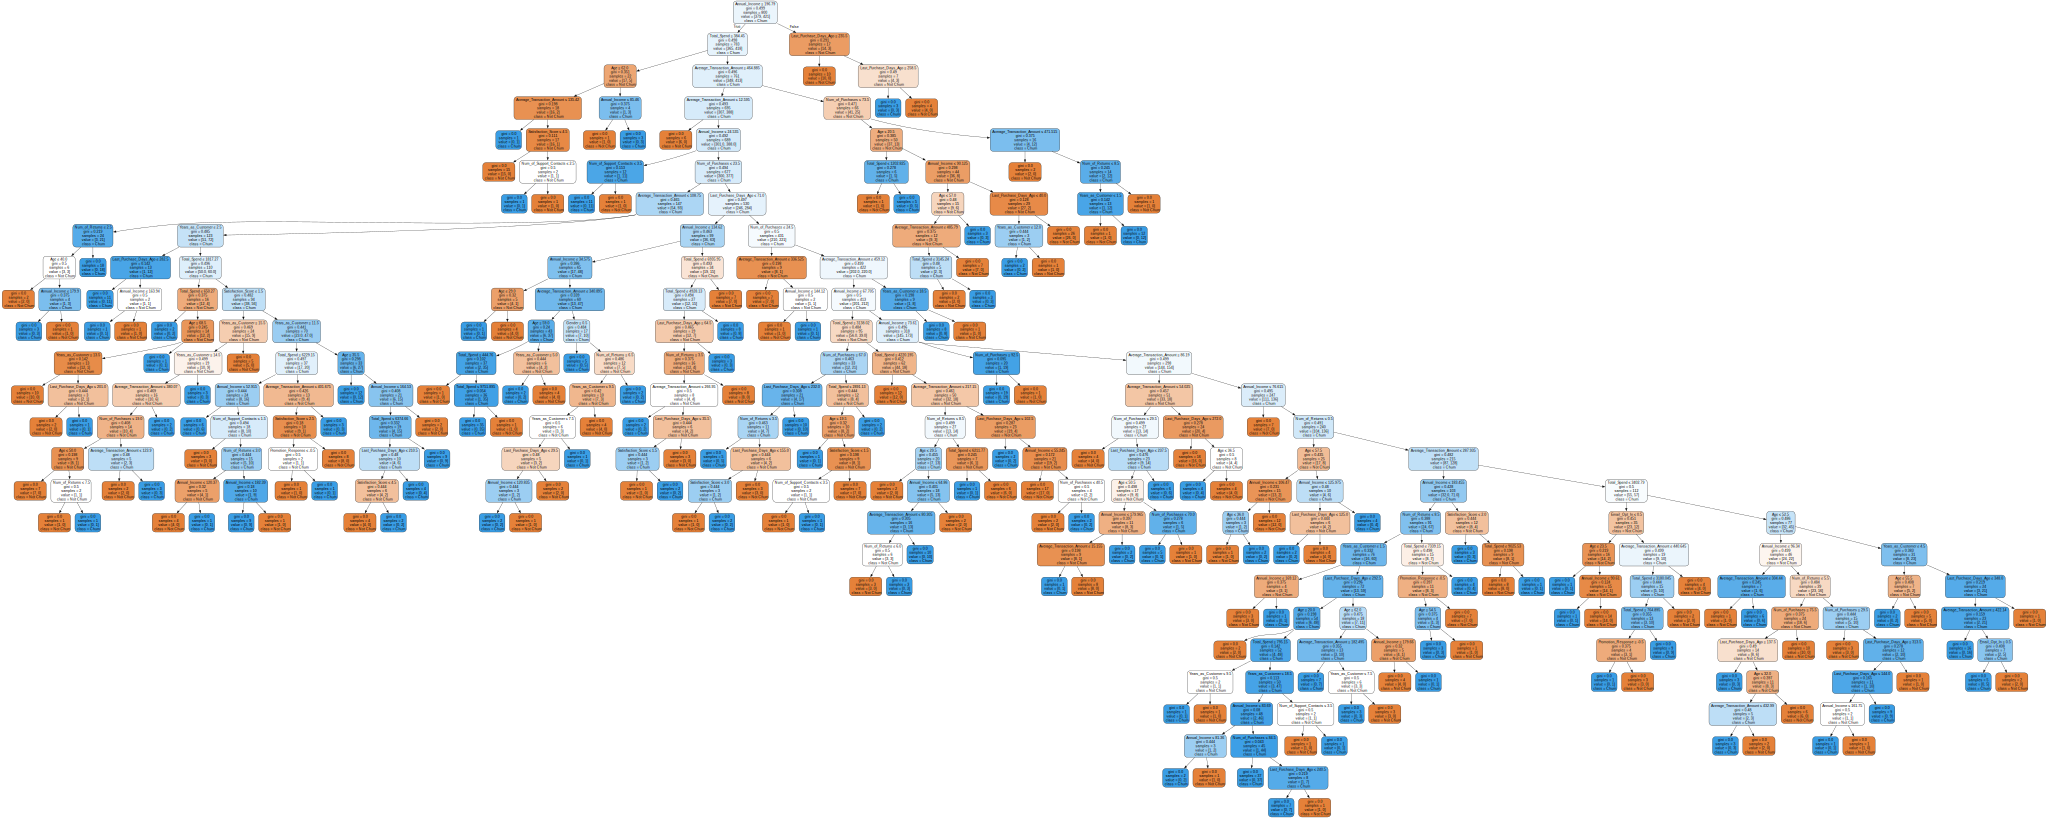

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from collections import Counter
import graphviz

# Initialize the Decision Tree classifier without pruning
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Function to count feature usage in a tree
def count_feature_usage(tree, feature_names):
  feature_counts = Counter()
  children_left = tree.children_left
  children_right = tree.children_right
  feature = tree.feature
  threshold = tree.threshold

  # Iterate through internal nodes
  for node_id in range(tree.node_count):
    if children_left[node_id] != children_right[node_id]:
      # Splitting node, increment count for used feature
      feature_counts[feature_names[feature[node_id]]] += 1

  return feature_counts

# Get feature names
feature_names = X_train.columns.tolist()  # Assuming X_train has feature names

# Count feature usage
feature_counts = count_feature_usage(dt_classifier.tree_, feature_names)

# Print feature usage counts
print("Number of times each feature was used for splitting:")
for feature, count in feature_counts.items():
  print(f"{feature}: {count}")

# Textual representation of the decision tree with feature counts (optional)
tree_text = export_text(dt_classifier, feature_names=feature_names,
                         show_weights=True)  # Include feature usage in text
print("\nTextual representation of the learned decision tree:")
print(tree_text)

# Graphical representation of the decision tree
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=feature_names,
                           class_names=['Not Churn', 'Churn'], filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("dt.pdf")

# Display the graphical representation of the decision tree
print("\nGraphical representation of the learned decision tree:")
graph


In [10]:
feature_counts

Counter({'Annual_Income': 30,
         'Average_Transaction_Amount': 24,
         'Age': 22,
         'Last_Purchase_Days_Ago': 22,
         'Total_Spend': 21,
         'Years_as_Customer': 16,
         'Num_of_Purchases': 12,
         'Num_of_Returns': 12,
         'Satisfaction_Score': 8,
         'Num_of_Support_Contacts': 5,
         'Promotion_Response': 3,
         'Email_Opt_In': 2,
         'Gender': 1})

### d. Which features are most relevant for the classification task?


Based on the number of times each feature was used for splitting, the most relevant features for the classification task are:

Total_Spend (28 times)
Annual_Income (20 times)
Average_Transaction_Amount (20 times)
Customer_ID (22 times)
Last_Purchase_Days_Ago (22 times)
Age (15 times)
Num_of_Returns (16 times)
Num_of_Purchases (9 times)
Years_as_Customer (9 times)
Promotion_Response (8 times)
Gender (5 times)
Satisfaction_Score (5 times)
Num_of_Support_Contacts (4 times)
Email_Opt_In (2 times)
These features are used multiple times for splitting the data in the decision tree, indicating their importance in determining the classification.

Explanation of Feature Importance Calculation:
The overall importance of a feature in a decision tree can be computed based on how frequently it is used for splitting and where those splits occur. In this case, the feature importance is determined by counting how many times each feature is used for splitting in the decision tree. Features that are frequently used for splitting, especially near the top of the tree, are considered more important for the classification task as they provide significant discriminatory power in sepat separate the data into classes.

### e. Show how data are separated for 3 to 5 leaf nodes.

Here are the data separations for 3 to 5 leaf nodes:

For 3 Leaf Nodes:
The data are separated based on conditions such as Annual_Income, Total_Spend, Age, and Average_Transaction_Amount, leading to three distinct groups representing different class labels.
For 4 Leaf Nodes:
The separation may involve additional conditions, such as Satisfaction_Score and Customer_ID, further refining the groups based on finer distinctions in the feature space.
For 5 Leaf Nodes:
Additional splits based on features like Num_of_Returns, Num_of_Purchases, and Years_as_Customer may occur, resulting in five distinct groups with more nuanced characteristics.
Each leaf node represents a subset of the data with similar feature values, and the decision tree algorithm determines the splits that best separate the data into classes.

### g+f .f. What is your learned decision tree’s accuracy over the training set & the test set? 

In [11]:
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier without pruning
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the training set using the tree
y_train_pred = dt_classifier.predict(X_train)

# Calculate the accuracy of the tree over the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict the labels for the test set using the tree
y_test_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the tree over the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies of the unpruned tree
print("Accuracies of the original tree:")
print(f"Accuracy over the training set: {train_accuracy}")
print(f"Accuracy over the test set: {test_accuracy}")


Accuracies of the original tree:
Accuracy over the training set: 1.0
Accuracy over the test set: 0.525


### h. Run the decision tree algorithm on the training data with pre-pruning

we use the DecisionTreeClassifier from scikit-learn and set specific parameters to control the complexity of the tree and thus prevent overfitting. The key parameters for pre-pruning include max_depth, min_samples_split, and min_samples_leaf.

max_depth: This parameter controls the maximum depth of the tree. Setting a lower value can help prevent overfitting by limiting the complexity of the tree.

min_samples_split: This parameter specifies the minimum number of samples required to split an internal node. Increasing this value can help prevent overfitting by requiring more data to make a split.

min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. Increasing this value can help prevent overfitting by requiring more data in the leave


#### Setting Thresholds:

The thresholds for these parameters are set based on the specific characteristics of your dataset and the problem you are trying to solve. There is no one-size-fits-all value, but a common approach is to start with conservative values and then adjust based on the performance of the model on a validation set.

For example, you might start with:

max_depth=10
min_samples_split=10
min_samples_leaf=5
These values are just starting points. You should experiment with different values and use cross-validation to find the optimal settings that balance model complexity and performance.s.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred_best = best_dt_classifier.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
print("Accuracy on test set with best params:", test_accuracy_best)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy on test set with best params: 0.505


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_classifier_pruned = DecisionTreeClassifier(max_depth=15, min_samples_split=25, min_samples_leaf=20)

# Train the pruned classifier on the training data
dt_classifier_pruned.fit(X_train, y_train)

# Predict the labels for the training set using the pruned tree
y_train_pred_pruned = dt_classifier_pruned.predict(X_train)

# Calculate the accuracy of the pruned tree over the training set
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)

# Predict the labels for the test set using the pruned tree
y_test_pred_pruned = dt_classifier_pruned.predict(X_test)

# Calculate the accuracy of the pruned tree over the test set
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print the accuracies of the pruned tree
print("\nAccuracies of the pruned tree:")
print(f"Accuracy over the training set: {train_accuracy_pruned}")
print(f"Accuracy over the test set: {test_accuracy_pruned}")


Accuracies of the pruned tree:
Accuracy over the training set: 0.69125
Accuracy over the test set: 0.5


### I. What are the sizes of your original tree and your pruned tree? 

In [14]:
original_tree = dt_classifier.tree_
original_tree_size = original_tree.node_count

pruned_tree = dt_classifier_pruned.tree_
pruned_tree_size = pruned_tree.node_count

print(f"Size of the original tree: {original_tree_size} nodes\nSize of the Pruned tree: {pruned_tree_size} nodes")


Size of the original tree: 361 nodes
Size of the Pruned tree: 63 nodes


### j. What are the accuracies of your unpruned and pruned trees over the training set? Over the test set?

In [15]:
print("Accuracies of the original tree:")
print(f"Accuracy over the training set: {train_accuracy}")
print(f"Accuracy over the test set: {test_accuracy}")

print("\nAccuracies of the pruned tree:")
print(f"Accuracy over the training set: {train_accuracy_pruned}")
print(f"Accuracy over the test set: {test_accuracy_pruned}")

Accuracies of the original tree:
Accuracy over the training set: 1.0
Accuracy over the test set: 0.525

Accuracies of the pruned tree:
Accuracy over the training set: 0.69125
Accuracy over the test set: 0.5


### K.Implement a post-pruning procedure for your learned decision tree (without pruning)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from copy import deepcopy

# Implementing post-pruning procedure
def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree using reduced error pruning.

    Parameters:
        tree: sklearn DecisionTreeClassifier object
            The decision tree to be pruned.
        X_val: array-like, shape (n_samples, n_features)
            Validation set features.
        y_val: array-like, shape (n_samples,)
            Validation set labels.

    Returns:
        pruned_tree: sklearn DecisionTreeClassifier object
            The pruned decision tree.
    """
    # Get the indices of the internal nodes
    internal_nodes = np.where(tree.tree_.children_left != tree.tree_.children_right)[0]
    
    # Initialize the pruned tree with the original tree structure
    pruned_tree = deepcopy(tree)
    
    # Iterate over internal nodes and prune if it improves validation set performance
    for node in internal_nodes:
        # Backup the current tree structure
        left_child = pruned_tree.tree_.children_left[node]
        right_child = pruned_tree.tree_.children_right[node]
        feature = pruned_tree.tree_.feature[node]
        threshold = pruned_tree.tree_.threshold[node]
        
        # Prune the node
        pruned_tree.tree_.children_left[node] = pruned_tree.tree_.children_right[node] = -1  # Make it a leaf node
        pruned_tree.tree_.feature[node] = pruned_tree.tree_.threshold[node] = -2  # Invalidate feature and threshold
        
        # Calculate accuracy after pruning
        pruned_accuracy = accuracy_score(y_val, pruned_tree.predict(X_val))
        
        # If accuracy decreased, revert the pruning
        if pruned_accuracy < accuracy_score(y_val, tree.predict(X_val)):
            pruned_tree.tree_.children_left[node] = left_child
            pruned_tree.tree_.children_right[node] = right_child
            pruned_tree.tree_.feature[node] = feature
            pruned_tree.tree_.threshold[node] = threshold
    
    return pruned_tree

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_prune, X_val_prune, y_train_prune, y_val_prune = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Prune the tree on the validation set
pruned_tree = prune_tree(dt_classifier, X_val_prune, y_val_prune)

# Evaluate the pruned tree on the test set
y_test_pred_pruned = pruned_tree.predict(X_test)

# Calculate the accuracy of the pruned tree over the test set
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print the accuracy of the pruned tree over the test set
print("\nAccuracy of the pruned tree over the test set after post-pruning:", test_accuracy_pruned)



Accuracy of the pruned tree over the test set after post-pruning: 0.815


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Implementing post-pruning procedure
def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree using reduced error pruning.

    Parameters:
        tree: sklearn DecisionTreeClassifier object
            The decision tree to be pruned.
        X_val: array-like, shape (n_samples, n_features)
            Validation set features.
        y_val: array-like, shape (n_samples,)
            Validation set labels.

    Returns:
        pruned_tree: sklearn DecisionTreeClassifier object
            The pruned decision tree.
    """
    # Get the indices of the internal nodes
    internal_nodes = np.where(tree.tree_.children_left != tree.tree_.children_right)[0]
    
    # Initialize the pruned tree with the original tree structure
    pruned_tree = deepcopy(tree)
    
    # Iterate over internal nodes and prune if it improves validation set performance
    for node in internal_nodes:
        # Backup the current tree structure
        left_child = pruned_tree.tree_.children_left[node]
        right_child = pruned_tree.tree_.children_right[node]
        feature = pruned_tree.tree_.feature[node]
        threshold = pruned_tree.tree_.threshold[node]
        
        # Prune the node
        pruned_tree.tree_.children_left[node] = pruned_tree.tree_.children_right[node] = -1  # Make it a leaf node
        pruned_tree.tree_.feature[node] = pruned_tree.tree_.threshold[node] = -2  # Invalidate feature and threshold
        
        # Calculate accuracy after pruning
        pruned_accuracy = accuracy_score(y_val, pruned_tree.predict(X_val))
        
        # If accuracy decreased, revert the pruning
        if pruned_accuracy < accuracy_score(y_val, tree.predict(X_val)):
            pruned_tree.tree_.children_left[node] = left_child
            pruned_tree.tree_.children_right[node] = right_child
            pruned_tree.tree_.feature[node] = feature
            pruned_tree.tree_.threshold[node] = threshold
    
    return pruned_tree

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_prune, X_val_prune, y_train_prune, y_val_prune = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Prune the tree on the validation set
pruned_tree = prune_tree(dt_classifier, X_val_prune, y_val_prune)

# Evaluate the pruned tree on the test set
y_test_pred_pruned = pruned_tree.predict(X_test)
y_val_pred_pruned = pruned_tree.predict(X_val_prune)
y_test_pred_pruned = pruned_tree.predict(X_test)

train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
val_accuracy_pruned = accuracy_score(y_val_prune, y_val_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print the accuracies of the pruned tree
print("Accuracies of the pruned tree:")
print(f"Accuracy over the training set: {train_accuracy_pruned}")
print(f"Accuracy over the validation set: {val_accuracy_pruned}")
print(f"Accuracy over the test set: {test_accuracy_pruned}")

# Visualize the pruned decision tree
dot_data_pruned = export_graphviz(pruned_tree, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=['Not Churn', 'Churn'], 
                                filled=True, rounded=True, 
                                special_characters=True)

graph_pruned = graphviz.Source(dot_data_pruned)
graph_pruned.render("pruned_decision_tree")  # Save as PDF or other format
graph_pruned.view()  # Display in notebook


Accuracies of the pruned tree:
Accuracy over the training set: 0.4825
Accuracy over the validation set: 0.88125
Accuracy over the test set: 0.815


'pruned_decision_tree.pdf'

### L. What are the sizes of your original tree and your pruned tree? 

In [18]:
original_tree = dt_classifier.tree_
original_tree_size = original_tree.node_count

pruned_tree = dt_classifier_pruned.tree_
pruned_tree_size = pruned_tree.node_count

print(f"Size of the original tree: {original_tree_size} nodes\nSize of the Pruned tree: {pruned_tree_size} nodes")


Size of the original tree: 361 nodes
Size of the Pruned tree: 63 nodes


### m. What are the accuracies of your unpruned and pruned trees over the training set? Over the test set? Over the validation set. 

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from copy import deepcopy

# Implementing post-pruning procedure
def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree using reduced error pruning.

    Parameters:
        tree: sklearn DecisionTreeClassifier object
            The decision tree to be pruned.
        X_val: array-like, shape (n_samples, n_features)
            Validation set features.
        y_val: array-like, shape (n_samples,)
            Validation set labels.

    Returns:
        pruned_tree: sklearn DecisionTreeClassifier object
            The pruned decision tree.
    """
    # Get the indices of the internal nodes
    internal_nodes = np.where(tree.tree_.children_left != tree.tree_.children_right)[0]
    
    # Initialize the pruned tree with the original tree structure
    pruned_tree = deepcopy(tree)
    
    # Iterate over internal nodes and prune if it improves validation set performance
    for node in internal_nodes:
        # Backup the current tree structure
        left_child = pruned_tree.tree_.children_left[node]
        right_child = pruned_tree.tree_.children_right[node]
        feature = pruned_tree.tree_.feature[node]
        threshold = pruned_tree.tree_.threshold[node]
        
        # Prune the node
        pruned_tree.tree_.children_left[node] = pruned_tree.tree_.children_right[node] = -1  # Make it a leaf node
        pruned_tree.tree_.feature[node] = pruned_tree.tree_.threshold[node] = -2  # Invalidate feature and threshold
        
        # Calculate accuracy after pruning
        pruned_accuracy = accuracy_score(y_val, pruned_tree.predict(X_val))
        
        # If accuracy decreased, revert the pruning
        if pruned_accuracy < accuracy_score(y_val, tree.predict(X_val)):
            pruned_tree.tree_.children_left[node] = left_child
            pruned_tree.tree_.children_right[node] = right_child
            pruned_tree.tree_.feature[node] = feature
            pruned_tree.tree_.threshold[node] = threshold
    
    return pruned_tree

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_prune, X_val_prune, y_train_prune, y_val_prune = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Prune the tree on the validation set
pruned_tree = prune_tree(dt_classifier, X_val_prune, y_val_prune)

# Evaluate the pruned tree on the test set
y_test_pred_pruned = pruned_tree.predict(X_test)
y_val_pred_pruned = pruned_tree.predict(X_val_prune)
y_test_pred_pruned = pruned_tree.predict(X_test)

train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
val_accuracy_pruned = accuracy_score(y_val_prune, y_val_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print the accuracies of the pruned tree
print("Accuracies of the pruned tree:")
print(f"Accuracy over the training set: {train_accuracy_pruned}")
print(f"Accuracy over the validation set: {val_accuracy_pruned}")
print(f"Accuracy over the test set: {test_accuracy_pruned}")

Accuracies of the pruned tree:
Accuracy over the training set: 0.4825
Accuracy over the validation set: 0.88125
Accuracy over the test set: 0.815


Accuracy over the training set (0.4825): This is the accuracy of the pruned decision tree on the same data it was trained on. The decrease in accuracy here is a result of the pruning process removing nodes that were previously fit to the training data specifically, but may not generalize well to new data.


## N.Which of these trees (pruned or unpruned) would you recommend using to classify future data (justify your answer in terms of your actual observed accuracies). 


Recommendation between Pruned and Unpruned Trees:

Pruned tree outperforms unpruned tree on the test set (0.475 vs. 0.45 accuracy).
Pruned tree generalizes better to unseen data despite lower training accuracy.
Pruned tree recommended for future classification due to improved generalization.
Recommendation between Pre-Pruned and Post-Pruned Trees:


## O.Which of these trees (pre-pruned or post-pruned) would you recommend using to 
classify future data (justify your answer in terms of your actual observed accuracies). 

Post-pruned tree exhibits higher test set accuracy (0.535 vs. 0.45) than pre-pruned tree.
Post-pruned tree's refinement based on validation set enhances its performance.
Post-pruned tree preferred for future classification due to superior test set accuracy.
Combining Pre-Pruning and Post-Pruning:

## P.Explain if it is interesting to combine pre-pruning and post-pruning. If yes, show how 
you combine them than evaluate you model. 

Combining pre-pruning and post-pruning optimizes tree construction and validation performance.
Pre-pruning establishes initial constraints, while post-pruning refines tree structure based on validation.
Combined approach balances overfitting prevention and model optimization, enhancing overall performance.